<a href="https://colab.research.google.com/github/alperbayram/TurkishNLP/blob/main/Twitter_Sentiment_Analysis_and_Text_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers

In [98]:
!pip install nest-asyncio

In [1]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/twint
Processing /content/twint
  Created wheel for twint: filename=twint-2.1.21-cp37-none-any.whl size=38863 sha256=93f7345dafbf9a3131889af60bd5d2a48b2efcd74be466faed301d36bb5e48c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-i5p8n60w/wheels/c9/bb/bd/2b559954ecc4f4905266df71e9f2e08268750df0fa1ec1a4d2
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [5]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
from datetime import datetime
import seaborn as sns
from scipy import stats
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [7]:
from pandas import Series, DataFrame
from datetime import datetime

In [8]:
now = datetime.now()
date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

date and time: 06/01/2021, 22:37:57


In [9]:
import nest_asyncio
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

# [**Twint**](https://github.com/twintproject/twint)
Python'da yazılmış, Twitter'ın API'sini kullanmayan gelişmiş bir Twitter kazıma ve OSINT aracı, çoğu API sınırlamasından kaçarken bir kullanıcının takipçilerini, takiplerini, Tweetlerini ve daha fazlasını kazımanıza olanak tanır.

In [86]:
import twint
   
print ("tweet alınıyor...")
c = twint.Config()
# kullanıcı adı giriniz
#c.Username = input('Username: ') 
c.Username = 'TwiterSonDakika'
c.Custom["tweet"] = ["date", "username","hour"]
c.Since = '2021-05-20'
c.until= '2021-06-01'
c.Pandas = True
twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df
print('başarılı!')

tweet alınıyor...
1399869871102386177 2021-06-01 23:26:00 +0000 <TwiterSonDakika> Seda Bakan bahçeyi podyuma çevirdi  https://t.co/KxzfNEAINO
1399869619318398979 2021-06-01 23:25:00 +0000 <TwiterSonDakika> Tarlasını sulamak isterken kanalda ceset buldu  https://t.co/RYuJwx1Tw6
1399867102706626560 2021-06-01 23:15:00 +0000 <TwiterSonDakika> Yeni normalleşme kararıyla birlikte restoranlar hizmete açıldı  https://t.co/TOyMnze0SF
1399865844490854404 2021-06-01 23:10:00 +0000 <TwiterSonDakika> Tuğba Ekinci Erdoğan'dan Özür Diledi: Müzisyenlere Göre Düzenleme İstiyorum  https://t.co/ImLTvteoBX
1399863831543832586 2021-06-01 23:02:00 +0000 <TwiterSonDakika> Kate Upton'ın pozuna beğeni yağdı  https://t.co/CodQvkoeyC
1399863328483196929 2021-06-01 23:00:00 +0000 <TwiterSonDakika> Sedat Peker'den inanılmaz hamle!  https://t.co/VXKB5PHjwo
1399862069726375936 2021-06-01 22:55:00 +0000 <TwiterSonDakika> Annesi vurulan karaca yavrusunu sokak köpeği kurtardı  https://t.co/DeZaRsPaIo
13998595530391593

In [87]:
    df_Tweetler=Tweets_df.filter(items=['tweet'])
    df_Tweets = pd.DataFrame(df_Tweetler)

In [88]:
 df_Tweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2287 non-null   object
dtypes: object(1)
memory usage: 18.0+ KB


# **Tweetlerin temizlenmesi **

In [89]:

#noktalama işaretleri
df_Tweets["tweet"] = df_Tweets["tweet"].str.replace('[^\w\s]','')
# #sayılar
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('\d','')
# df_Tweetler["Tweets"]= df_Tweetler["Tweets"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('@[A-Za-z0-9]+','')
df_Tweets["tweet"] =df_Tweets["tweet"].str.replace('http\S+','')

In [90]:
df_Tweets["tweet"]

0                    Seda Bakan bahçeyi podyuma çevirdi  
1        Tarlasını sulamak isterken kanalda ceset buldu  
2       Yeni normalleşme kararıyla birlikte restoranla...
3       Tuğba Ekinci Erdoğandan Özür Diledi Müzisyenle...
4                      Kate Uptonın pozuna beğeni yağdı  
                              ...                        
2282    En çok vaka düşüşü yaşanan kentte pazarcılarda...
2283    Hindistanda Covid salgında yeni rekor son  saa...
2284    İzmirde  kişinin öldüğü olayla ilgili  tutukla...
2285    Alkollü sürücü dur ihtarına uymadı otomobili p...
2286    İçişleri Bakanı Süleyman Soyludan Hadi Özışık ...
Name: tweet, Length: 2287, dtype: object

In [91]:
text = " ".join(review for review in df_Tweets.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 150469 words in the combination of all review.


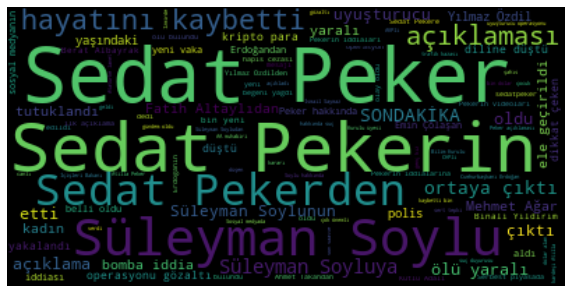

In [92]:

stopwords = set(STOPWORDS)
stopwords.update(["ben", "sen", "biz", "de", "ki", "ve", "da", "bir", "ile", "için", "bu", "ne", "gibi","amk"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [93]:
data_path =  "/resource/"

try:
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/resource/"

except:
    print("You are not working in Colab at the moment :(")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
wordcloud.to_file("/content/drive/My Drive/img/kelimebulutu.png")

# **DUYGU ANALİZİ KISMI BERT MODELLERİNİN YÜKLENMESİ**

In [95]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

In [96]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

In [98]:
analysis=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [99]:
analysis("allah belanı versin. seni sevmiyorum.")

[{'label': 'negative', 'score': 0.9965597987174988}]

In [101]:
code_to_label={
 'negative': 'negatif',
 'positive': 'pozitif',
    'notr': 'notr'
    
}

In [102]:
orders = df_Tweets.value_counts().count()
print('Tweet sayısı :',orders)
#len(df_Tweetler.Tweets)

Tweet sayısı : 1433


In [103]:
Tweet = list(df_Tweets['tweet'])
Tweet

['Seda Bakan bahçeyi podyuma çevirdi  ',
 'Tarlasını sulamak isterken kanalda ceset buldu  ',
 'Yeni normalleşme kararıyla birlikte restoranlar hizmete açıldı  ',
 'Tuğba Ekinci Erdoğandan Özür Diledi Müzisyenlere Göre Düzenleme İstiyorum  ',
 'Kate Uptonın pozuna beğeni yağdı  ',
 'Sedat Pekerden inanılmaz hamle  ',
 'Annesi vurulan karaca yavrusunu sokak köpeği kurtardı  ',
 'Balıkesirde  şüpheliye fuhuş operasyonu  ',
 'Köylülerden taş ocağına karşı Denizli Valiliği önünde oturma eylemi  kişi zengin olacak diye köyümüzü talan ediyorlar  ',
 'Sakaryada rüşvet operasyonu  gözaltı  ',
 'Nikahlar davetliler huzurunda kıyılmaya başlandı  ',
 'Eda Eceden Anadolu Efes paylaşımı Hemen sildi  ',
 'En zehirli türler arasında yer alıyor o ilde görüldü  ',
 'Hastane otoparkındaki cinayete  yıl hapis  ',
 'Bakan Koca haftalık vaka haritasını paylaştı  ',
 'Didem Soydan Galata sokaklarında  ',
 'Saray İttifakını sarsacak tefecilik davası  ',
 'Şezlonglar  metre mesafeli olarak sahillerde yerini a

# **Tweeetlerin tek tek gezilmesi ve sonuçların ve scorun boş diziye aktarılması**

In [104]:
d= list()
k= list()
for i in range(orders):
                    c= analysis(Tweet[i])
                    #a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    h =  c[0]['score']
                    #d =np.append(a)
                    d.append(a)
                    k.append(h)

# **Sonuçların Tabloya eklenmesi**

In [105]:
d
df_Tweetler["Tweets_duygu"]= pd.DataFrame(d)
#df_Tweetler["Tweets_duygu"]=df_Tweetler["Tweets"].map(lambda x: "".join(d))


# **Sonuç**

In [108]:
df_Tweetler['Tweets_duygu'].value_counts()

negatif    1086
pozitif     347
Name: Tweets_duygu, dtype: int64

# **Sonuçların Görselleştirilmesi**

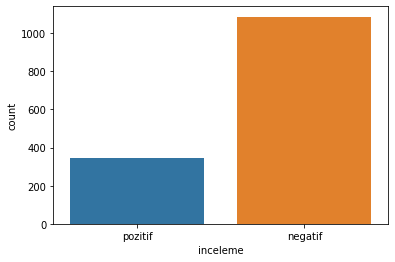

In [109]:
sns.countplot(df_Tweetler.Tweets_duygu)
plt.xlabel('inceleme');

# **Pasta histogram ile gösterilmesi**

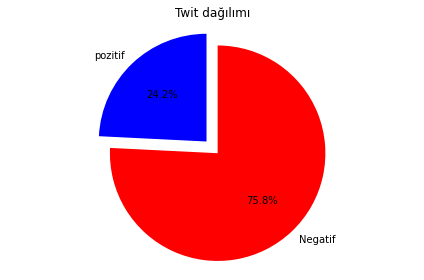

In [110]:

pozitif = (df_Tweetler['Tweets_duygu'] == 'pozitif').sum()
negatif = (df_Tweetler['Tweets_duygu'] == 'negatif').sum()

# put them into a list called proportions
proportions = [pozitif, negatif]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['pozitif', 'Negatif'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Twit dağılımı")

# View the plot
plt.tight_layout()
plt.show()

# **Histogram olarak gösterilmesi**

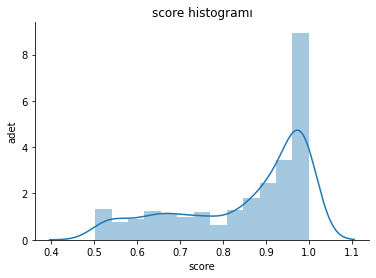

In [111]:

# create histogram
ttbill = sns.distplot(k);

# set lables and titles
ttbill.set(xlabel = 'score', ylabel = 'adet', title = "score histogramı")

# take out the right and upper borders
sns.despine()

# TWEETLERİN SINFILANDIRILMASI 

Turk-bert modellerinin yğklenmesi

In [112]:
Tweet

['Seda Bakan bahçeyi podyuma çevirdi  ',
 'Tarlasını sulamak isterken kanalda ceset buldu  ',
 'Yeni normalleşme kararıyla birlikte restoranlar hizmete açıldı  ',
 'Tuğba Ekinci Erdoğandan Özür Diledi Müzisyenlere Göre Düzenleme İstiyorum  ',
 'Kate Uptonın pozuna beğeni yağdı  ',
 'Sedat Pekerden inanılmaz hamle  ',
 'Annesi vurulan karaca yavrusunu sokak köpeği kurtardı  ',
 'Balıkesirde  şüpheliye fuhuş operasyonu  ',
 'Köylülerden taş ocağına karşı Denizli Valiliği önünde oturma eylemi  kişi zengin olacak diye köyümüzü talan ediyorlar  ',
 'Sakaryada rüşvet operasyonu  gözaltı  ',
 'Nikahlar davetliler huzurunda kıyılmaya başlandı  ',
 'Eda Eceden Anadolu Efes paylaşımı Hemen sildi  ',
 'En zehirli türler arasında yer alıyor o ilde görüldü  ',
 'Hastane otoparkındaki cinayete  yıl hapis  ',
 'Bakan Koca haftalık vaka haritasını paylaştı  ',
 'Didem Soydan Galata sokaklarında  ',
 'Saray İttifakını sarsacak tefecilik davası  ',
 'Şezlonglar  metre mesafeli olarak sahillerde yerini a

In [113]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-turkish-text-classification")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-turkish-text-classification")

In [114]:
sınıf=pipeline("text-classification", model=model, tokenizer=tokenizer)

In [115]:
Tweet[25]

'Kırışıklıklara karşı savaşan  doğal yağ  '

In [116]:
a = sınıf(Tweet[25])
a

[{'label': 'health', 'score': 0.9883554577827454}]

In [117]:
code_to_label={
 'world': 'dunya ',
 'economy': 'ekonomi ',
 'culture': 'kultur ',
 'health': 'saglik ',
 'politics': 'siyaset ',
 'sport': 'spor ',
 'technology': 'teknoloji '}

In [118]:
a = sınıf(Tweet[20])
#d = code_to_label[a[0]['label']]
a
#d

[{'label': 'health', 'score': 0.9347538948059082}]

In [119]:
kategori= list()
for i in range(orders):
                    c= sınıf(Tweet[i])
                    a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    #d =np.append(a)
                    kategori.append(a)

In [66]:
#kategori

In [120]:
kategori
df_Tweetler["sınıflandırma"]= pd.DataFrame(kategori)
#df_Tweetler["Tweets_duygu"]=df_Tweetler["Tweets"].map(lambda x: "".join(d))


In [123]:
df_Tweetler.head()

,tweet,Tweets_duygu,sınıflandırma
0,Seda Bakan bahçeyi podyuma çevirdi,pozitif,saglik
1,Tarlasını sulamak isterken kanalda ceset buldu,negatif,siyaset
2,Yeni normalleşme kararıyla birlikte restoranla...,negatif,ekonomi
3,Tuğba Ekinci Erdoğandan Özür Diledi Müzisyenle...,negatif,kultur
4,Kate Uptonın pozuna beğeni yağdı,negatif,kultur


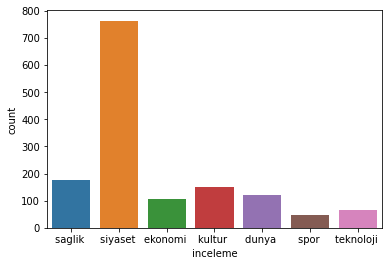

In [124]:
sns.countplot(df_Tweetler.sınıflandırma)
plt.xlabel('inceleme');

In [125]:
df_Tweetler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          2287 non-null   object
 1   Tweets_duygu   1433 non-null   object
 2   sınıflandırma  1433 non-null   object
dtypes: object(3)
memory usage: 53.7+ KB


In [126]:
sonuciki = df_Tweetler["sınıflandırma"].value_counts()
sonuciki

siyaset       763
saglik        177
kultur        152
dunya         120
ekonomi       107
teknoloji      66
spor           48
Name: sınıflandırma, dtype: int64

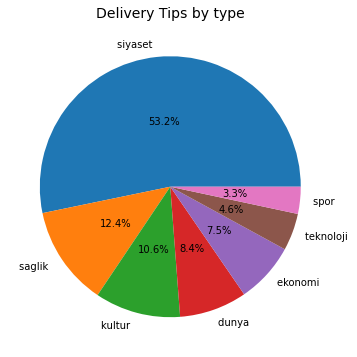

In [127]:
pie, ax = plt.subplots(figsize=[10,6])
labels = sonuciki.keys()
plt.pie(x=sonuciki, autopct="%.1f%%", explode=None, labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);

In [128]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [129]:
df_Tweetler.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

[***Evet arkdaşlar sona geldiniz bi starınız alırım... :) İşinize yaradıysa ne mutlu bana..kolay gelsin***](https://github.com/alperbayram/Turkish-NLP-examples)